<a href="https://colab.research.google.com/github/passosvasconcelos/well-log-data-analysis/blob/main/Log%20Analysis%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#!pip install seaborn
#!pip install lasio
#!git clone https://github.com/passosvasconcelos/well-log-data-analysis.git
#%ls
#!rm -rf 'well-log-data-analysis'

Cloning into 'well-log-data-analysis'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 47 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import lasio
import seaborn as sns

# Machine learning libraries

from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

# Visualization libraries
import matplotlib.pylab as plt
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns



In [2]:
dataset = {}
faciesset = {}
mnemonic_description = {}
mnemonic_unit = {}
lasfiles = ['/content/well-log-data-analysis/1-api-1-pr_wire.las',
           '/content/well-log-data-analysis/1-ca-3-pr_wire.las',
           '/content/well-log-data-analysis/1-cs-2-pr_wire.las',
           '/content/well-log-data-analysis/1-gb-1-pr_wire.las',
           '/content/well-log-data-analysis/1-gp-1-pr_wire.las',
           '/content/well-log-data-analysis/1-mo-1-pr_wire.las',
           '/content/well-log-data-analysis/1-mo-2-pr_wire.las',
           '/content/well-log-data-analysis/1-r-1-pr_wire.las',
           '/content/well-log-data-analysis/1-rca-1-pr_wire.las',
           '/content/well-log-data-analysis/1-ro-1-pr_wire.las',
           '/content/well-log-data-analysis/1-rs-1-pr_wire.las',
           '/content/well-log-data-analysis/2-an-1-pr_wire.las',
           '/content/well-log-data-analysis/2-ri-1-pr_wire.las',
           '/content/well-log-data-analysis/2-rp-1-pr_wire.las',
           '/content/well-log-data-analysis/2-tb-1-pr_wire.las']

for file in lasfiles:
    las = lasio.read(file)
    dataset[las.well.WELL.value] = las.df()
    faciesset[las.well.WELL.value] = pd.read_csv('/content/well-log-data-analysis/'+las.well.WELL.value.lower()+'_lith.csv')
    for i in las.curves:
        mnemonic_description[i.mnemonic] = i.descr
        mnemonic_unit[i.mnemonic] = i.unit
    
    
#faciesfiles = ['1-api-1-pr_lith.csv',
#              '1-ca-3-pr_lith.csv',
#              '1-cost-1p-pr_lith.csv',
#              '1-cs-2-pr_lith.csv',
#              '1-gb-1-pr_lith.csv',
#              '1-gp-1-pr_lith.csv',
#              '1-mo-1-pr_lith.csv',
#              '1-mo-2-pr_lith.csv',
#              '1-r-1-pr_lith.csv',
#              '1-rca-1-pr_lith.csv',
#              '1-ro-1-pr_lith.csv',
#              '1-rs-1-pr_lith.csv',
#              '2-an-1-pr_lith.csv',
#              '2-ri-1-pr_lith.csv',
#              '2-rp-1-pr_lith.csv',
#              '2-tb-1-pr_lith.csv']






In [3]:
dataset.keys()

dict_keys(['1-API-1-PR', '1-CA-3-PR', '1-CS-2-PR', '1-GB-1-PR', '1-GP-1-PR', '1-MO-1-PR', '1-MO-2-PR', '1-R-1-PR', '1-RCA-1-PR', '1-RO-1-PR', '1-RS-1-PR', '2-AN-1-PR', '2-RI-1-PR', '2-RP-1-PR', '2-TB-1-PR'])

In [4]:
mnemonic_description

{'AMP': 'Amplitude',
 'AMP:1': 'Amplitude',
 'AMP:2': 'Amplitude',
 'AMP:3': 'Amplitude',
 'CAL1': 'Caliper',
 'CAL2': 'Caliper',
 'CALI': '2  SHORT ARM CALIPER',
 'CALI:1': 'Caliper',
 'CALI:2': 'Caliper',
 'CALI:3': 'Merged WIRE.CALI_2 with WIRE.CALI_1 at 3571.67',
 'CALI:4': 'Caliper',
 'CBFS:1': 'Unrecognised',
 'CBFS:2': 'Unrecognised',
 'CBL': 'Amplitude',
 'CBL:1': 'Amplitude',
 'CBL:2': 'Amplitude',
 'CBLF:1': 'Unrecognised',
 'CBLF:2': 'Unrecognised',
 'CILD': 'Deep induction conductivity',
 'CILD:1': 'Deep Conductivity',
 'CILD:2': 'Deep induction conductivity',
 'CS:1': 'Cable Speed',
 'CS:2': 'Cable Speed',
 'CS:3': 'Cable Speed',
 'DEPTH': '1  DEPTH',
 'DRHO': 'Bulk density correction',
 'DRHO:1': 'Density Correction',
 'DRHO:2': 'Bulk density correction',
 'DRHO:3': 'Merged WIRE.DRHO_2 with WIRE.DRHO_1 at 3572.72',
 'DT': '3  DELTA TRAVEL TIME',
 'DT:1': 'Sonic delta-T',
 'DT:2': 'Sonic delta-T',
 'DT:3': 'Merged WIRE.DT_3 with WIRE.DT_2 at 3571.67',
 'DTL': 'Sonic Transi

In [5]:
mnemonic_unit

{'AMP': '',
 'AMP:1': '',
 'AMP:2': '',
 'AMP:3': '',
 'CAL1': 'MM',
 'CAL2': 'MM',
 'CALI': 'IN',
 'CALI:1': 'MM',
 'CALI:2': 'MM',
 'CALI:3': 'MM',
 'CALI:4': 'MM',
 'CBFS:1': '',
 'CBFS:2': '',
 'CBL': '',
 'CBL:1': '',
 'CBL:2': '',
 'CBLF:1': '',
 'CBLF:2': '',
 'CILD': '',
 'CILD:1': '',
 'CILD:2': '',
 'CS:1': '',
 'CS:2': '',
 'CS:3': '',
 'DEPTH': 'M',
 'DRHO': '',
 'DRHO:1': 'G/C3',
 'DRHO:2': 'G/C3',
 'DRHO:3': 'K/M3',
 'DT': 'US/F',
 'DT:1': 'US/F',
 'DT:2': 'US/M',
 'DT:3': 'US/M',
 'DTL': 'US/M',
 'DTSI': '',
 'DT_BHC': 'US/F',
 'ETIM:1': '',
 'ETIM:2': '',
 'ETIM:3': '',
 'FCNL': '',
 'FFDC': '',
 'FTEMP': 'DEGF',
 'GR': 'GAPI',
 'GR:1': '',
 'GR:2': '',
 'GR:3': 'GAPI',
 'ILD': '',
 'ILD:1': 'OHMM',
 'ILD:2': 'OHMM',
 'ILD:3': 'OHMM',
 'ILM': '',
 'ILM:1': '',
 'ILM:2': '',
 'ITT': '',
 'ITT:1': '',
 'ITT:2': '',
 'ITT:3': '',
 'ITT:4': '',
 'LITH': '',
 'LITH:1': '',
 'LITH:2': '',
 'LL': '',
 'LL3': '',
 'LL:1': '',
 'LL:2': '',
 'LLD': '',
 'LLS': '',
 'LS': '',
 'LS

In [6]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(logs.info())


well: 1-API-1-PR
<class 'pandas.core.frame.DataFrame'>
Float64Index: 12720 entries, 4004.1 to 5911.95
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CALI:1  12277 non-null  float64
 1   CALI:2  12292 non-null  float64
 2   DRHO    12292 non-null  float64
 3   DT      12454 non-null  float64
 4   FCNL    12292 non-null  float64
 5   FFDC    12292 non-null  float64
 6   GR:1    12280 non-null  float64
 7   GR:2    12281 non-null  float64
 8   ILD     12277 non-null  float64
 9   ILM     12277 non-null  float64
 10  MSFL    12211 non-null  float64
 11  NCNL    12292 non-null  float64
 12  NFDC    12292 non-null  float64
 13  NPHI    12292 non-null  float64
 14  RHOB    12292 non-null  float64
 15  RLN     12277 non-null  float64
 16  TENS:1  12283 non-null  float64
 17  TENS:2  12290 non-null  float64
 18  TT1     12454 non-null  float64
 19  TT2     12454 non-null  float64
 20  TT3     12454 non-null  float64
 21  TT4     

In [7]:
for well, logs in dataset.items():
    dataset[well] = dataset[well].rename_axis('DEPTH').reset_index()
dataset['1-CA-3-PR'][['DEPTH', 'GR:1','GR:2']].iloc[3475:3490,:]

,DEPTH,GR:1,GR:2
3475,1577.6448,50.1957,NaN
3476,1577.7972,50.1939,NaN
3477,1577.9496,50.4866,NaN
3478,1578.1020,51.0818,NaN
3479,1578.2544,51.6770,NaN
3480,1578.4068,53.1661,NaN
3481,1578.5592,53.7607,NaN
3482,1578.7116,54.6523,NaN
3483,1578.8640,54.6499,NaN
3484,1579.0164,NaN,48.5


In [8]:
for well, logs in dataset.items():
    loganterior='--:--'
    for log in logs:
        if ":" in log:
            if loganterior.split(":")[0] == log.split(':')[0]:
                dataset[well][log] = logs[loganterior].fillna(logs[log])
                dataset[well].pop(loganterior)
            loganterior=log
    for log in logs:
        if ":" in log:
            dataset[well][log.split(":")[0]] = dataset[well][log]
            dataset[well].pop(log)

In [9]:
dataset['1-CA-3-PR'][['DEPTH', 'GR']].iloc[3475:3490,:]

,DEPTH,GR
3475,1577.6448,50.1957
3476,1577.7972,50.1939
3477,1577.9496,50.4866
3478,1578.1020,51.0818
3479,1578.2544,51.6770
3480,1578.4068,53.1661
3481,1578.5592,53.7607
3482,1578.7116,54.6523
3483,1578.8640,54.6499
3484,1579.0164,48.5000


In [10]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].info())


well: 1-API-1-PR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12720 entries, 0 to 12719
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   12720 non-null  float64
 1   DRHO    12292 non-null  float64
 2   DT      12454 non-null  float64
 3   FCNL    12292 non-null  float64
 4   FFDC    12292 non-null  float64
 5   ILD     12277 non-null  float64
 6   ILM     12277 non-null  float64
 7   MSFL    12211 non-null  float64
 8   NCNL    12292 non-null  float64
 9   NFDC    12292 non-null  float64
 10  NPHI    12292 non-null  float64
 11  RHOB    12292 non-null  float64
 12  RLN     12277 non-null  float64
 13  TT1     12454 non-null  float64
 14  TT2     12454 non-null  float64
 15  TT3     12454 non-null  float64
 16  TT4     12454 non-null  float64
 17  TTI     12455 non-null  float64
 18  CALI    12320 non-null  float64
 19  GR      12310 non-null  float64
 20  TENS    12318 non-null  float64
dtypes: float64(21)
me

In [11]:
dataset['1-CA-3-PR'] = dataset['1-CA-3-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'RLN']].rename(columns={"RLN": "RES"})
dataset['1-CS-2-PR'] = dataset['1-CS-2-PR'][['DEPTH', 'CAL2', 'GR', 'DT', 'ILD']].rename(columns={"CAL2": "CALI", "ILD": "RES"})
dataset['1-MO-2-PR'] = dataset['1-MO-2-PR'][['DEPTH', 'GR', 'DT', 'RLN']].rename(columns={"RLN": "RES"})
dataset['1-RS-1-PR'] = dataset['1-RS-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['2-TB-1-PR'] = dataset['2-TB-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'RLN']].rename(columns={"RLN": "RES"})
dataset['2-RI-1-PR'] = dataset['2-RI-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['1-RO-1-PR'] = dataset['1-RO-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['2-RP-1-PR'] = dataset['2-RP-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['2-AN-1-PR'] = dataset['2-AN-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['1-GB-1-PR'] = dataset['1-GB-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['1-API-1-PR'] = dataset['1-API-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'RLN']].rename(columns={"RLN": "RES"})
dataset['1-MO-1-PR'] = dataset['1-MO-1-PR'][['DEPTH', 'GR', 'DT', 'RLN']].rename(columns={"RLN": "RES"})
dataset['1-RCA-1-PR'] = dataset['1-RCA-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['1-GP-1-PR'] = dataset['1-GP-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'ILD']].rename(columns={"ILD": "RES"})
dataset['1-R-1-PR'] = dataset['1-R-1-PR'][['DEPTH', 'GR', 'DT', 'RLN']].rename(columns={"RLN": "RES"})


In [12]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].info())


well: 1-API-1-PR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12720 entries, 0 to 12719
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   12720 non-null  float64
 1   CALI    12320 non-null  float64
 2   GR      12310 non-null  float64
 3   DT      12454 non-null  float64
 4   RES     12277 non-null  float64
dtypes: float64(5)
memory usage: 497.0 KB
None

well: 1-CA-3-PR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   10689 non-null  float64
 1   CALI    7178 non-null   float64
 2   GR      10656 non-null  float64
 3   DT      10643 non-null  float64
 4   RES     7175 non-null   float64
dtypes: float64(5)
memory usage: 417.7 KB
None

well: 1-CS-2-PR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24885 entries, 0 to 24884
Data columns (total 5 columns):
 #   Column 

In [13]:
for well, logs in dataset.items():
    dataset[well] = dataset[well].set_index('DEPTH').join(faciesset[well].set_index('DEPTH'))
    dataset[well] = pd.merge_ordered(dataset[well], faciesset[well], fill_method="ffill", on="DEPTH")
    dataset[well].pop('LITHOLOGY_x')
    dataset[well] = dataset[well].rename(columns={"LITHOLOGY_y": "LITHOLOGY"})

In [14]:
dataset['2-RP-1-PR'].head()

,DEPTH,CALI,GR,DT,RES,LITHOLOGY
0,3263.55,275.0972,52.8071,59.0856,17.0216,SS
1,3263.70,NaN,NaN,NaN,NaN,SS
2,3263.85,274.0980,55.3565,58.6048,17.3357,SS
3,3264.00,272.8349,57.1590,58.1130,17.3389,SS
4,3264.15,271.8199,56.7190,57.8145,17.3445,SS


In [ ]:
#for well, logs in dataset.items():
    
    #dataset[well] = dataset[well][['GR', 'DT', 'RLN']]
#    dataset[well] = dataset[well].dropna(axis=0, how='any')
    
    

In [15]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].isna().sum())


well: 1-API-1-PR
DEPTH          0
CALI         400
GR           410
DT           266
RES          443
LITHOLOGY      0
dtype: int64

well: 1-CA-3-PR
DEPTH            0
CALI         10480
GR            6844
DT            6857
RES          10483
LITHOLOGY        0
dtype: int64

well: 1-CS-2-PR
DEPTH            0
CALI         21134
GR           21152
DT           21546
RES          21546
LITHOLOGY        0
dtype: int64

well: 1-GB-1-PR
DEPTH             0
CALI          80993
GR           130153
DT           129517
RES           40009
LITHOLOGY         0
dtype: int64

well: 1-GP-1-PR
DEPTH            0
CALI          8372
GR           15775
DT            8443
RES           8386
LITHOLOGY        0
dtype: int64

well: 1-MO-1-PR
DEPTH          0
GR             0
DT           127
RES            0
LITHOLOGY      0
dtype: int64

well: 1-MO-2-PR
DEPTH        0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-R-1-PR
DEPTH          0
GR           516
DT           98

In [17]:
for well, logs in dataset.items():    
    dataset[well] = dataset[well].dropna(subset=['GR', 'DT', 'RES'], axis=0, how='any')
    print('\nwell: '+well)
    print(dataset[well].isna().sum())


well: 1-API-1-PR
DEPTH        0
CALI         0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-CA-3-PR
DEPTH        0
CALI         0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-CS-2-PR
DEPTH        0
CALI         0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-GB-1-PR
DEPTH            0
CALI         39366
GR               0
DT               0
RES              0
LITHOLOGY        0
dtype: int64

well: 1-GP-1-PR
DEPTH        0
CALI         0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-MO-1-PR
DEPTH        0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-MO-2-PR
DEPTH        0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-R-1-PR
DEPTH        0
GR           0
DT           0
RES          0
LITHOLOGY    0
dtype: int64

well: 1-RCA-1-PR
DEPTH        0
CALI         1
GR           

In [18]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].describe())


well: 1-API-1-PR
              DEPTH          CALI            GR            DT           RES
count  12221.000000  12221.000000  12221.000000  12221.000000  12221.000000
mean    4968.409250    272.868621     58.848646     58.248617    652.074043
std      537.681931     35.397379     29.345742      6.008827   2228.920906
min     4037.250000    221.078500     10.392200     46.992800      0.241600
25%     4502.850000    246.033600     33.769300     55.294600     20.121100
50%     4968.450000    261.485800     51.505400     58.615300     38.687500
75%     5434.050000    288.322200     82.820400     61.723900     87.750000
max     5899.650000    438.727500    146.545800     80.144800   9750.035200

well: 1-CA-3-PR
             DEPTH         CALI           GR           DT          RES
count  7459.000000  7459.000000  7459.000000  7459.000000  7459.000000
mean   2123.933562   265.905611    80.233222   213.700030   276.051889
std     315.071377    48.368700    30.886210    86.635974   564.8205

In [ ]:
for well, logs in dataset.items():
    dataset[well] = dataset[well][(logs.GR>0) & (logs.DT>0) & (logs.RLN>0)]

In [ ]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].info())

In [ ]:
#for well, logs in dataset.items():
#    if well!='2-TB-1-PR':
#        dataset[well]['DT'] = dataset[well]['DT']/3.281

In [19]:
for well, logs in dataset.items():
    print('\nwell: '+well)
    print(dataset[well].LITHOLOGY.unique())


well: 1-API-1-PR
['SH' 'DMT' 'SS' 'IGN' 'ST']

well: 1-CA-3-PR
['SS' 'SH' 'DMT' 'ST' 'IGN' 'CLU']

well: 1-CS-2-PR
['SS' 'ST' 'SH' 'DMT' 'IGN']

well: 1-GB-1-PR
['SS' 'SH' 'ST' 'IGN' 'CSS']

well: 1-GP-1-PR
['DMT' 'SS' 'ST' 'SH' 'IGN']

well: 1-MO-1-PR
['SS' 'DMT' 'ST' 'SH' 'CGL' 'IGN']

well: 1-MO-2-PR
['DMT' 'SS' 'SH' 'ST' 'CGL' 'IGN']

well: 1-R-1-PR
['IGN' 'SH' 'DOL' 'SS' 'ST' 'CSS' 'DMT']

well: 1-RCA-1-PR
['IGN' 'SH' 'SS' 'ST' 'CLU' 'DMT']

well: 1-RO-1-PR
['SS' 'ST' 'SH' 'CSS' 'DMT' 'IGN']

well: 1-RS-1-PR
['ST' 'SH' 'IGN' 'DOL' 'SS' 'DMT']

well: 2-AN-1-PR
['DMT' 'SS' 'SH' 'ST' 'IGN']

well: 2-RI-1-PR
['SH' 'DMT' 'SS' 'ST' 'IGN' 'CGL']

well: 2-RP-1-PR
['SS' 'ST' 'DMT' 'IGN' 'SH']

well: 2-TB-1-PR
['SH' 'SS' 'HT' 'ST']


In [20]:
def setlithcodes(lithology):
    if lithology == 'SS':
        return 1
    elif lithology == 'ST':
        return 2
    elif lithology == 'HT':
        return 3
    elif lithology == 'SH':
        return 4
    elif lithology == 'CSS':
        return 5
    elif lithology == 'CST':
        return 6
    elif lithology == 'CLU':
        return 7
    elif lithology == 'IGN':
        return 8
    elif lithology == 'DMT':
        return 9
    elif lithology == 'CGL':
        return 10
    elif lithology == 'DOL':
        return 11


In [21]:
for well, logs in dataset.items():    
    dataset[well]['LITH_CODE'] = logs.apply(lambda x: setlithcodes(x['LITHOLOGY']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
def log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor, faciescode, clustercolor=0):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bottom = logs.DEPTH.max()
    n_cols = max(logtrack.values())+2
    if clustercolor!=0:
        n_cols = n_cols+1
    facies_track = n_cols-1
    cluster_track = n_cols-2
    f, ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (12,8))
    
    for k, v in logtrack.items():
        ax[v].plot(logs[k], logs.DEPTH, color = logcolor[k], label = k)
        ax[v].set_xlabel(k)
        ax[v].set_xlim(logmin[k],logmax[k])
        ax[v].set_xscale(logscale[k])
        ax[v].set_ylim(top, bottom)
        ax[v].invert_yaxis()
        ax[v].grid(True)        
        ax[v].legend(fontsize='small', loc='upper right')
        
    cmap_facies = colors.ListedColormap(faciescolor, 'indexed')
    cluster=np.repeat(np.expand_dims(logs['LITH_CODE'].values,1),100,1)
    im=ax[facies_track].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies)
    cbar=plt.colorbar(im, ax=ax[facies_track])
    labels = faciescode
    cbar.set_label((20*' ').join(labels))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    if clustercolor!=0:
        cmap_cluster = colors.ListedColormap(clustercolor.values())
        cluster2=np.repeat(np.expand_dims(logs['CLUSTER'].values,1),100,1)
        im2=ax[cluster_track].imshow(cluster2, interpolation='none', aspect='auto',cmap=cmap_cluster)
        #cbar2=plt.colorbar(im2, ax=ax[cluster_track])
        #labels2 = map(str, clustercolor.keys())
        #cbar2.set_label((15*' ').join(labels2))
        #cbar2.set_ticks(range(0,1)); cbar.set_ticklabels('')
        ax[cluster_track].set_xlabel("Clusters")
        ax[cluster_track].set_xticklabels([])
    
        
    for i in ax[1:]:
        i.set_yticklabels([])
        #i.locator_params(axis='x', nbins=4)
    ax[0].set_ylabel("Depth (m)")   
    ax[facies_track].set_xlabel("Lithology")
    ax[facies_track].set_xticklabels([])
    #ax.set_axis_off()
    
    #f.suptitle('Well: 2-TB-1-PR', fontsize=14,y=0.94)

In [23]:
dataset['2-RP-1-PR'].LITHOLOGY.unique()

array(['SS', 'ST', 'DMT', 'IGN', 'SH'], dtype=object)

In [36]:
logs = dataset['2-RP-1-PR'][['DEPTH', 'CALI', 'GR', 'DT', 'RES', 'LITHOLOGY', 'LITH_CODE']]
logcolor = {'CALI':'blue', 'GR':'green', 'DT':'black', 'RES':'black'}
faciescode = ['SS', 'ST', 'DMT', 'IGN', 'SH']
faciescolor = ['yellow', 'orange', 'green' ,'red', 'black']
logtrack = {'CALI':0, 'GR':1, 'DT':2, 'RES':3}
logmin = {'CALI':100, 'GR':0, 'DT':140, 'RES':0.1}
logmax = {'CALI':350, 'GR':250, 'DT':40, 'RES':10000}
logscale = {'CALI':'linear', 'GR':'linear', 'DT':'linear', 'RES':'log'}


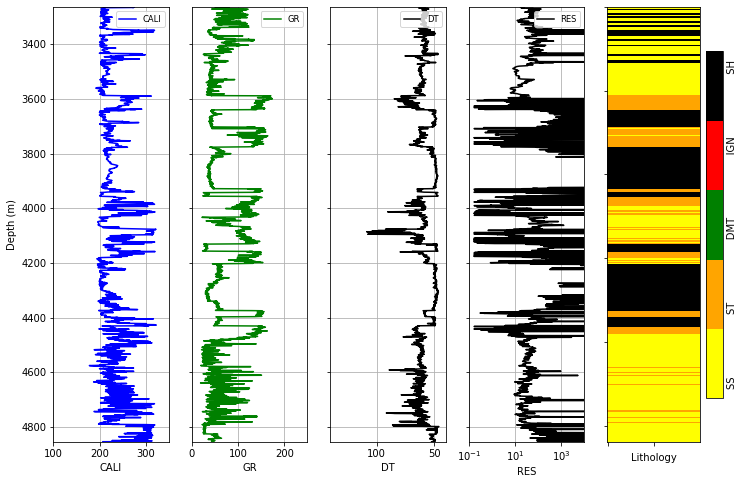

In [37]:
log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor, faciescode)

In [31]:
dataset['2-RP-1-PR'].describe()

,DEPTH,CALI,GR,DT,RES,LITH_CODE
count,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000
mean,4058.600091,231.085998,71.864911,58.049557,24717.939369,4.188667
std,458.936464,29.935938,40.215853,7.835980,40673.624074,3.050759
min,3263.550000,178.017800,18.825000,46.026400,0.167000,1.000000
25%,3661.387500,209.324625,40.503875,50.012175,21.873675,1.000000
50%,4058.625000,221.030300,55.350800,59.004000,66.211850,4.000000
75%,4454.662500,243.130200,106.845025,62.437775,36532.187500,8.000000
max,4855.500000,322.953900,174.172400,108.539100,100000.000000,9.000000


In [ ]:
#logs = logs.astype({"LITHOLOGY":'category'})

logs['GR'] = logs['GR'].rolling(12, min_periods=1).mean()
logs['DT'] = logs['DT'].rolling(12, min_periods=1).mean()
logs['RLN'] = logs['RLN'].rolling(12, min_periods=1).mean()
logs['RLAT'] = logs['RLAT'].rolling(12, min_periods=1).mean()

In [ ]:
log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor)

In [ ]:
logs.info()

In [ ]:
sns.set_style("white")

plt.figure(figsize = (10,7), dpi = 80)

sns.histplot(data=logs, x = 'GR', hue='LITHOLOGY', palette=faciescolor, stat = 'density', kde=True)
plt.xlim(logs.GR.min(),logs.GR.max())

plt.figure(figsize = (10,7), dpi = 80)
sns.histplot(data=logs, x = 'DT', hue='LITHOLOGY', palette=faciescolor, stat = 'density', kde=True)
plt.xlim(logs.DT.min(),logs.DT.max())

plt.figure(figsize = (10,7), dpi = 80)
sns.histplot(data=logs, x = 'RLN', hue='LITHOLOGY', palette=faciescolor, stat = 'density', kde=True, log_scale=True)
plt.xlim(logs.RLN.min(),logs.DT.max())


In [ ]:
ax1 = sns.lmplot(data=logs, x='GR', y='DT', hue='LITHOLOGY', palette=faciescolor, fit_reg=False).set(xlim=(50, 220), ylim=(60, 110))
ax2 = sns.lmplot(data=logs, x='GR', y='RLAT', hue='LITHOLOGY', palette=faciescolor, fit_reg=False).set(xlim=(50, 220), ylim=(200, 20))
ax2.set(yscale="log")
ax3 = sns.lmplot(data=logs, x='GR', y='RLN', hue='LITHOLOGY', palette=faciescolor, fit_reg=False).set(xlim=(50, 220), ylim=(200, 20))
ax3.set(yscale="log")


In [ ]:
logs['Vsh'] = (logs.GR - logs.GR.min()) / (logs.GR.max() - logs.GR.min())

In [ ]:
logcolor['Vsh'] = 'green'
logtrack['Vsh'] = 5
logmin['Vsh'] = 0
logmax['Vsh'] = 1
logscale['Vsh'] = 'linear'

In [ ]:
logs.head()

In [ ]:
from sklearn.preprocessing import scale
logs_norm = logs.iloc[:, 2:5]
data = scale(logs_norm)

In [ ]:
data

In [ ]:
inertias = []
means = []
maxK = 30
for k in range(1, maxK):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('# of clusters', fontsize=24)
plt.ylabel('Sum of squared errors', fontsize=24)
plt.tick_params(labelsize=18)
# fig.savefig('images/Figure_3_k_means.tif', dpi=300, bbox_inches='tight')
# fig.savefig('images/Figure_3_k_means.png', dpi=300, bbox_inches='tight')

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)

# add the cluster ids to the dataset
#logs['Cluster'] = kmeans.labels_ + 1
logs['CLUSTER'] = kmeans.labels_

In [ ]:
cluster_colors = {2:'yellow', 4:'orange', 0:'green', 3:'purple', 1:'black'}

fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True)
b = sns.boxplot(x='CLUSTER', y='GR', linewidth=0.5,
            data=logs, ax=ax[0,0],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("A",fontsize=20)
b.set_xlabel("")
b.set_ylabel("GR (gAPI)",fontsize=20)
b.tick_params(labelsize=14)

b = sns.boxplot(x='CLUSTER', y='DT', linewidth=0.5,
            data=logs, ax=ax[0,1],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("B",fontsize=20)
b.set_xlabel("")
b.set_ylabel("DT (uS/ft)",fontsize=20)
b.tick_params(labelsize=14)

b=sns.boxplot(x='CLUSTER', y='RLN', linewidth=0.5,
            data=logs, ax=ax[1,0],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("C",fontsize=20)
b.set_xlabel("Cluster Index",fontsize=20)
b.set_ylabel("RLN (ohm.m)",fontsize=20)
b.tick_params(labelsize=14)
b.invert_yaxis()
b.set_yscale("log")

b=sns.boxplot(x='CLUSTER', y='RLAT', linewidth=0.5,
            data=logs, ax=ax[1,1],
            palette=cluster_colors.values(), order=[2, 4, 0, 3, 1])
b.set_title("D",fontsize=20)
b.set_xlabel("Cluster Index",fontsize=20)
b.set_ylabel("RLAT (ohmm)",fontsize=20)
b.tick_params(labelsize=14)
b.invert_yaxis()
b.set_yscale("log")

#plt.tight_layout()
# fig.savefig('images/Figure_4_Cluster_fingerprint.png', dpi=300, bbox_inches='tight')
# fig.savefig('images/Figure_4_Cluster_fingerprint.tif', dpi=300, bbox_inches='tight')

In [ ]:
logs.head()

In [ ]:
clustercolor = {0:'green', 1:'black', 2:'yellow', 3:'purple', 4:'orange' }
log_plot(logs, logcolor, logmin, logmax, logscale, logtrack, faciescolor, clustercolor)